In [126]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

## 0. Notes based on common homework issues
* When turning in Jupyter notebooks by committing them to a git repository, please make sure you have run every cell in your notebook and then saved the state of the notebook. This will allow us to view your notebook output through GitHub and it will ensure that all of your cells are working as expected prior to final submission.

## 0.a. Git repository clean-up

* Make sure both your Lab 1 Jupyter notebook and python script are commited and pushed to the branch you made the first week.
* Make sure your homework from last week is committed and pushed to GitHub.

## 0.b. We will now each create a private repository through GitHub

* Go to your GitHub profile page.
* Click on Repositories
* Click on "New"
* Give our new repository the name E11Homework (or something similar)
* IMPORTANT: Check "Private"
* Check "Initialize this repository with a README
* Click "Create repository"
* Go to "Settings"
* Click on "Collaborators" on the left side-bar (you will be prompted for your GitHub password
* Add me (alihanks) and Chris (cllamb0) as collaborators so that we can view  your future homework submissions.


## 0.c. Now clone this new repository locally
* Click on "Clone or Download" and copy the HTTPS url for your new repository 
* At your GitBash or Terminal commmand line: 

` $ git clone <url-to-your-repository>` (paste the url after git clone)
* Open Jupyter notebook and navigate to your new repository folder (directory)
* Create a new notebook and name it "Statistics-Lab-Activity"

# Homework Part 1:
1. Correct your lab 1 activity notebook based on the solutions posted here: https://github.com/engineering-11/Activities/blob/master/Results/Lab%201%20Activity-Solutions.ipynb
2. Move your corrected notebook, the python script you created last week, and the homework you submitted today to your private repository and add/commit everything to that repository.

# We are ready to start the lab!

## 1. Getting your data

We have a Raspberry pi computer running as a webserver that is hosting the data we will be using today. The first step is to download that data.

* Over WiFi connect to `RPiTouchServer`. The WPA2 password will be provided in lab.
* Make a folder for keeping data - at the command-line prompt:
```
$ cd ~
$ mkdir E11data
```

* Copy the data from the RPi server to this folder - at your command-line prompt:
```
$ scp pi@192.168.4.1:~/data/Inside* ~/E11data
```

* This step will prompt you for a password for the `pi` user on that server, this will be provided in lab.

## 2. Prepare your Jupyter Notebook

Import the python libraries we will need for this activity

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# We will need these to use pre-defined functions for Gaussian and Poisson distributions
from scipy.stats import norm
from scipy.stats import poisson

## 3. Read in your data csv (comma-separated-variable) file using pandas

In [24]:
data = pd.read_csv("~/E11data_backup/Inside_p1_g3_2019-09-17_2s_D3S.csv")

Take a look at the output. Each line in this file is a list of 4096 values. Each row gives the number of counts (interaction in the detector) measured at the energy corresponding to that column value (0-4096).

In [5]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.4073,0.4074,0.4075,0.4076,0.4077,0.4078,0.4079,0.4080,0.4081,0.4082
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Put this pandas DataFrame into a numpy array so that we can perform fast manipulations of the data
spectra = np.array(data)

### 3.a. Let's take a look at the integrated spectrum
By this I mean we will sum over all rows in our array to see the total counts across the full energy range recoreded.

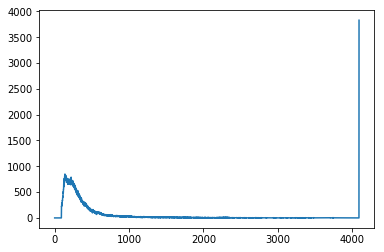

In [8]:
spectrum = spectra.sum(axis=0)
plt.plot(spectrum)
plt.show()

### 3.b. Let's try that as a log plot

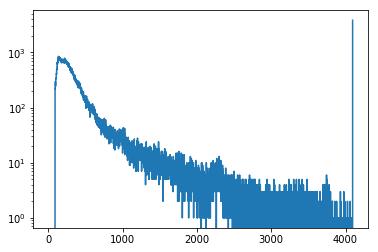

In [9]:
plt.plot(spectrum)
plt.yscale("log")
plt.show()

### 3.c. Try zooming in on the counts between columns 1000 and 2000 (x-axis range)

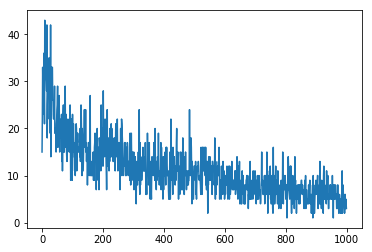

In [11]:
plt.plot(spectrum[1000:2000])
#plt.yscale("log")
plt.show()

### Check for understanding: Why are these points fluctuating so much and is this what we expect?

* We can think of each column as a bin in a histogram
* To improve these fluctuations we need more counts in each bin
* We could do this by taking more data but we can also do it now by combining counts in adjacent bins - rebinning

In [26]:
print(spectrum.shape)
spectrum_resize = np.resize(spectrum,(1028,4))
print(spectrum_resize.shape)

(4096,)
(1028, 4)


In [27]:
# We've split our 4096 bins into 4 sets of 1028 bins, we now just need to sum those together
spectrum_rebin = spectrum_resize.sum(axis=1)
print(spectrum_rebin.shape)

(1028,)


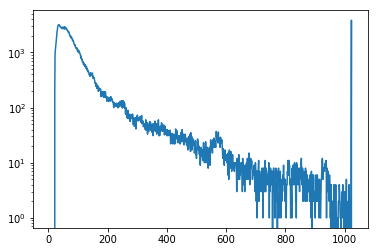

In [28]:
plt.plot(spectrum_rebin)
plt.yscale("log")
plt.show()

### Check for understanding: If we now want to zoom in on the same section we looked at in the initial spectrum, what index range do we want to look at?

We've rebinned by 4, so the array elements that were previously ranging from 1000 - 2000 are now ranging from 250 - 500

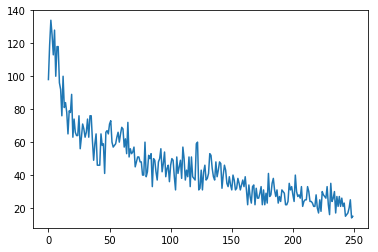

In [30]:
plt.plot(spectrum_rebin[250:500])
#plt.yscale("log")
plt.show()

## 4. Now we will look at total counts

* This involves summing the original 2D array across the other axis 
* So instead of summing all rows, we will sum across all columns for each row and get total counts within the time interval data was collected for
  * that is the data that goes in to each row

In [26]:
counts = spectra.sum(axis=1)
counts

array([15, 23, 19, ..., 31, 16, 29])

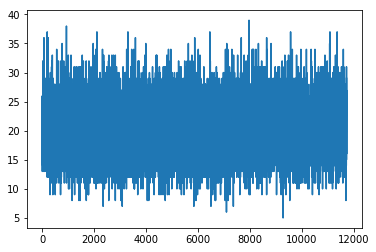

In [32]:
plt.plot(counts)
plt.show()

### Check for understanding: Each entry in `counts` contains the total number of counts, `N`, collected over a 2s interval, what is the uncertainty on that number?

Let's zoom in again

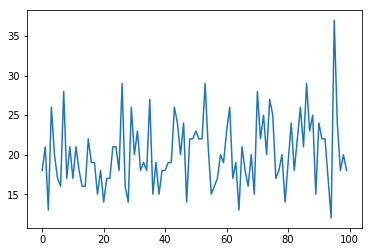

In [33]:
plt.plot(counts[100:200])
plt.show()

Do these fluctuations make sense? Based on our answer above about the uncertainty on the number of counts, we can plot this distribution with error bars.

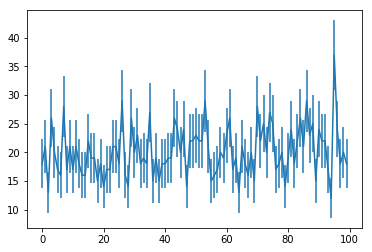

In [35]:
x = range(len(counts[100:200]))
plt.errorbar(x,counts[100:200],np.sqrt(counts[100:200]))
plt.show()

### 4.a. Make a histogram of this data

To start with, determine the total range of values in counts

In [29]:
xmin = np.min(counts)
xmax = np.max(counts)
print(xmin)
print(xmax)
nbins = xmax-xmin+1

5
39


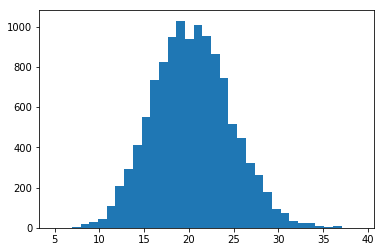

In [30]:
plt.hist(counts,bins=nbins)
plt.show()

### 4.b. Determine the mean and standard deviation and plot the corresponding Gaussian (Normal) distribution

For this, recall that the functional form for the Gaussian distribution is:

$ \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Where $\mu = \overline x$ - the mean of the distribution, and $\sigma$ is the standard deviation.

We can rely on a python package that has predefined the normal distribution, but we will also go through making our own, which has the advantage of being able to control the normalization.

In [133]:
def gaussian(x, mu, sigma):
    func = 1/(sigma*math.sqrt(2*math.pi))*np.exp(-np.power((x-mu),2)/(2*math.pow(sigma,2)))
    return func

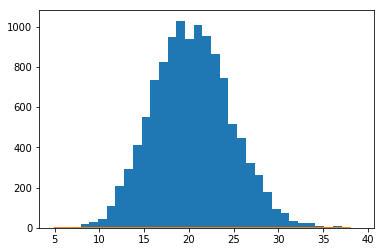

In [135]:
mu = np.mean(counts)
sigma = np.std(counts)

plt.hist(counts,bins=nbins)
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

### Why can't we see the Gaussian distribution. Try graphing it by itself

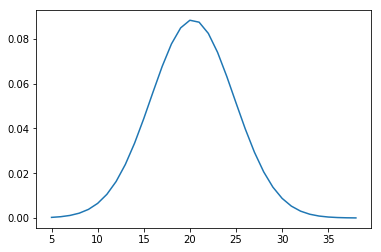

In [136]:
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

Let's also try the pre-defined method to see how that works

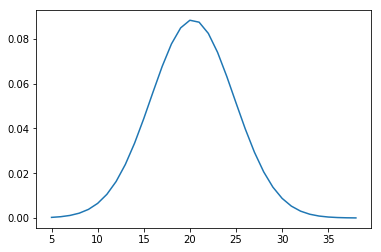

In [140]:
x = np.arange(xmin, xmax, 1)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

This Gaussian distribution is a probability distribution, that means it's normalized to so that $\Sigma(P(x)) = 1$.

We need to normalize our histogram as well! How do we do that?

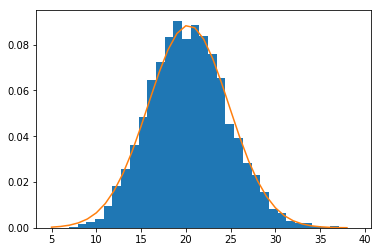

In [137]:
plt.hist(counts,bins=nbins,density=True)
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

### So is a Normal distribution the right distribution to describe this data?

What is the average number of counts?

In [59]:
print(np.mean(counts))

20.29889865960898


At what mean value of our measured quantity did we say that the Gaussian distribution became applicable?

Let's try Poisson and see if it does better? Recall that the functional form for the Poisson distribution is:

$ \frac{\mu^{x}e^{-\mu}}{x!}$

again $\mu = \overline x$ - the mean value of the distribution.

In [143]:
# We importat a library called poisson, so we need to call our function something else
# We do need a way to take factorials of arrays, though, and we find that here
from scipy.special import factorial
# Now we're ready to make our function
def my_poisson(x, mu):
    func = np.power(mu,x)*np.exp(-1*mu)/factorial(x)
    return func

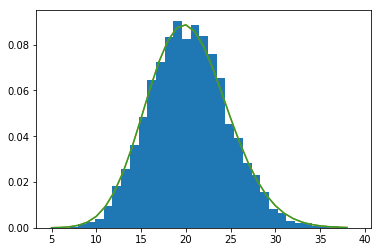

In [144]:
plt.hist(counts,bins=nbins,density=True)
x = np.arange(xmin, xmax, 1)
plt.plot(x, poisson.pmf(x, mu)) # This is the predefined way to get a Poisson distribution
plt.plot(x, my_poisson(x, mu))
plt.show()

### NOTE: next week we'll discuss how we might compare which of these distributions is doing a better job describing the data more quantitatively

## 5. Now back to that spectrum to study average energy

Let's remind ourselves what the total energy spectrum looks like first.

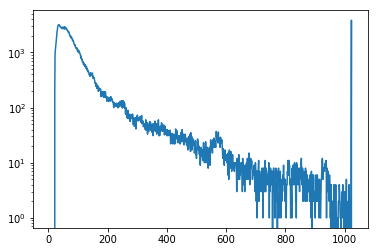

In [80]:
plt.plot(spectrum_rebin)
plt.yscale("log")
plt.show()

### 5.a. What's the average energy measured across this entire data set?

Recall from class that we can calculate an average value for some measurement, x, as $\overline x = \left<x\right> = \Sigma xF(x)$

This holds for determining the expectation value for any variable x described by the frequency distribution F(x), provided we've defined F(x) such that $\Sigma F(x) = 1$.

Our energy spectrum above provides the frequency with which counts at a particular energy occurr, we just need to normalize this distribution to sum to one.

In [92]:
spectrum_integral = spectrum_rebin.sum()
print(spectrum_integral)

237761


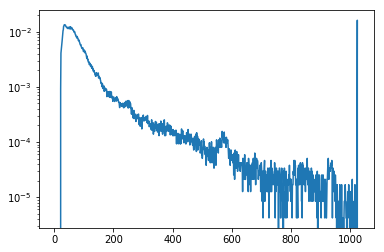

In [93]:
spectrum_norm = spectrum_rebin/spectrum_integral
plt.plot(spectrum_norm)
plt.yscale("log")
plt.show()

In [95]:
mean_x = 0
for x,F in enumerate(spectrum_norm):
    mean_x += x*F
print(mean_x)

114.89535710230012


### 5.b. What would happen if we remove the excess counts at high energy?

These are an artifact of the detector, and not really part of the real radiation distribution.

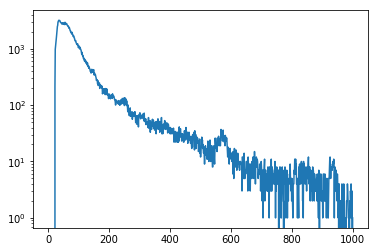

In [96]:
sub_spectrum = spectrum_rebin[:1000]
plt.plot(sub_spectrum)
plt.yscale("log")
plt.show()

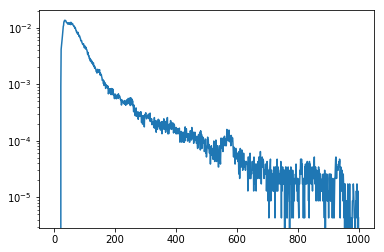

In [99]:
spectrum_integral = sub_spectrum.sum()
spectrum_norm = sub_spectrum/spectrum_integral
plt.plot(spectrum_norm)
plt.yscale("log")
plt.show()

In [146]:
# Note, we used a for loop above, but we can do this a little more "Pythonically"
mean_x = sum([x*F for x,F in enumerate(spectrum_norm)])
print(mean_x)

99.90312485303488


### 5.c. Now we will look at "samples" within this data set to explore variations in the measured energy

To do this, we will split up our spectra into equal chunks by slicing the original 2D array

In [104]:
spectra_sample = spectra[0:100]
spectrum_sample = spectra_sample.sum(axis=0)
# We want to cut out the high energy junk but we haven't rebinned this version, so we need to gut at 4000 not 1000
spectrum_sample = spectrum_sample[:4000]

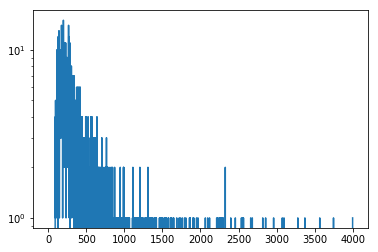

In [105]:
plt.plot(spectrum_sample)
plt.yscale("log")
plt.show()

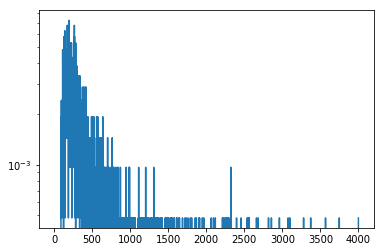

In [108]:
spectrum_integral = spectrum_sample.sum()
norm_sample = spectrum_sample/spectrum_integral
plt.plot(norm_sample)
plt.yscale("log")
plt.show()

In [110]:
sample_mean_x = 0
for x,F in enumerate(norm_sample):
    sample_mean_x += x*F
print(sample_mean_x)

396.42092574734824


### This is suprising? But wait! In this distribution `x` goes from 0 - 4000, not 0 - 1000. We rebinned before.

These x values are effectively 4 times the previous case. So we can simply divide this answer by the ribinning factor, 4.

In [111]:
sample_mean_x = 0
for x,F in enumerate(norm_sample):
    sample_mean_x += x*F
sample_mean_x = sample_mean_x/4
print(sample_mean_x)

99.10523143683706


## 6. We can now do this same thing for all of our samples of the spectra

### 6.a. Following the same steps as we took in 5.c. (not including plotting), build up a list of the sample mean "Energy" - $\left<x\right>$ - for N slices, where each slice grabs 100 entries (spectra).

* **First:** How many spectra did we take? We can find this out by looking at the length of the `counts` array from earlier, because each entry in that array is the sum of all the counts collected in that spectrum.

In [112]:
len(counts)

11713

There are almost 12000 spectra! 

If we devide these up into chunks of 100, we will have to repeat the work done in 5.c 117 times. We should not do this manually! That would mean writing out code like this:
```
spectra_sample1 = spectra[0:100]
...


```

```
spectra_sample2 = spectra[100:200]
...


```

```
spectra_sample3 = spectra[200:300]
...


```

And doing that 117 times!

Instead, we can define a function that executes all of the steps needed and returns the resulting $\left<x\right>$ for the specified chunk: `spectra[start:stop]`.

We can then create a loop that iterates over the desired `start` and `stop` until we have a list of 117 $\left<x\right>$ values, one for each chunk of spectra.

### 6.b. Plot your list of mean x values (the mean energy of each sample spectrum) in a histogram

### 6.c. What are the mean and standard deviation of this distribution?

### 6.d. Add the Gaussian (Normal) distribution curve defined by this mean and sigma to your plot of the histogrammed average energies

Don't forget to plot your histogram as a normalized distribution!